<h1> Projeto 2 de Ciências de Dados </h1>

<h2> Grupo 20 </h2>
    <br>
    <h4> Integrantes: 
    <br>
    <br>
    <ul>
    <li> Venâncio Freitas </li>
    <br>
    <li> Welington Rodrigues </li>
    <br>
    <li> Henrique Puppi </li>
    <br>
    <li> Gabriel Fonseca </li>
    <br>
    </ul>
    </h4>

## 1. Visão Geral do Projeto 

### Objetivo 

 <p> O Trabalho em questão, envolverá a análise de uma base de dados na qual temos dados sociais sobre pessoas em situação de rua, a partir disso, iremos traçar o perfil envolvendo determinada situação de um desabrigado. Dessa forma, iremos levar em consideração tanto o perfil socioeconômico, quanto questões socioecônimocas regionais, para, a partir disso, obter-se informções acerca de um panorama geral dos indicadores. </p>

### Motivações 

<p> Um dos grandes indicadores de desenvolvimento regional e da qualidade de vida de uma região, é o número de pessoas em situação de rua. Sendo assim, o grupo entende como relevante ao governo de um Estado entender o perfil por trás dessas situações para, a partir disso, destinar recursos para reduzir tal situação. </p>

### Base de Dados  Principal 

<p> A base de dados que será analisada, trata-se de um Censo Realizado pela prefeitura de São Paulo no Ano de 2021, como já mencionado, e seu acesso é possível a partir do seguinte link: <a href='https://www.prefeitura.sp.gov.br/cidade/secretarias/assistencia_social/censo_2021/index.php?p=2007'> Censo 2021</a>

    
<h3> As features da base de dados são as seguintes: </h3>
<br>
<br>
<li> Situação de rua : Estado da Pessoa em relação à situação </li>
<li> Onde dormiu ontem: Local onde a pessoa dormiu no dia anterior ao dia de pesquisa </li> 
<li> Tempo de Permanencia: Tempo em que a pessoa passou nas ruas </li>
<li> Sexo: Sexo de nascença da pessoa </li> 
<li> Se identifica com o sexo de nascença:  Sexo ao qual a pessoa se identifica</li>
<li> Idade: Número da idade da pessoa </li> 
<li> Faixa de idade: Intervalo de 10 anos da idade da pessoa </li> 
<li> Classificação de idade: Classificação de idade da pessoa </li> 
<li> Cor_Raça_Etnia: Cor, raça, ou Etnia da pessoa </li> 
<li> Parentes no CA: Se a pessoa tem parentes em Centros de Acolhimento </li>
<li> Tempo na Situação: Tempo ao qual a pessoa encontra-se na situação ao qual ela está </li> 
<li> Tipo de Ponto: Tipo de local na rua ao qual ela encontra-se </li> 
<li> Presença_Moradia_Improvisada : Indica se a pessoa tem ou não moradia improvisada na sua situação </li> 
<li> Criança_acomp_adulto: Se tem criança acompanho de adulto entre o grupo consultado </li> 
<li> Criança_sozinha: Se tem uma criança sozinha na entrevista </li> 
<li> Latitude: Latitude da localidade ao qual a pessoa foi entrevistada </li> 
<li> Longitude: Longitude da pessoa entrevistada </li> 
<li> Data: Data ao qual foi feita a pesquisa </li> 
<li> Subprefeitura: Subprefeitura da cidade de São Paulo onde foi feita a entrevista </li> 
<li> Distrito: Divisão Administrativa do Município de São Paulo </li>

<br>
<br>

### Base de dados Secundária 

<p>Como, na situação analisada, torna-se relevante, também, a análise de indicadores sociais regionais, buscou-se pelo grupo tais indicadores sociais correspondentes às subprefeituras da cidade de São Paulo. Porém, nos deparamos com dificuldades para encontrar dados recentes e, por isso, só foi possível encontrar dados do censo de 2010 da cidade de São Paulo, mostrados para a professora orientadora Maria Kelly, e assim, aceitos para o estudo em questão. </p>

Segue Abaixo o Link com a base de dados e o dicionário das variáveis: 

<a href  = 'https://dados.gov.br/dados/conjuntos-dados/atlasbrasil' > Indicadores  Atlas da Cidade de São Paulo <a/> 

### Target 

O Target de Análise será a coluna 'Situação de rua', a qual, a partir das análises feitas pelo grupo, será feita a predicao de perfil, para definir se a pessoa está na Rua ou em Centros de Acolhimentos.

### Importando Bibliotecas relevantes para o Projeto

In [15]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
from math import*
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import folium.plugins 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from folium.plugins import HeatMap
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import folium.plugins 
from folium.plugins import HeatMap
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

## 1. Identificação e Limpeza das Bases de dados 

### Remoção de colunas inconclusivas e irrelevantes para a análise: 

In [16]:
df = pd.read_excel('dados.xlsx')
df = pd.DataFrame(df)


df.head(5)

,ID,Situação de rua,Onde dormiu ontem,Tempo de permanência,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,...,Tempo na situação,Tipo de ponto,Presença_Moradia_Improvisada,Criança_acomp_Adulto,Criança_Sozinha,Latitude,Longitude,Data,Subprefeitura,Distrito
0,1,Rua,Não se aplica,Não se aplica,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Praça,Não,Não,Não,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,2,Acolhido,Rua,Não se aplica,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,...,Mais de 10 anos,Não se aplica,Não se aplica,Não se aplica,Não se aplica,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,3,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,...,Mais de 2 anos até 5 anos,Praça,Sim,Não,Não,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,4,Rua,Não se aplica,Não se aplica,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,...,Mais de 5 anos até 10 anos,Calçada,Sim,Não,Não,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,5,Rua,Não se aplica,Não se aplica,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,...,NR/NS,Canteiro central,Sim,Não,Não,-23.525142,-46.625523,2021-11-09,Mooca,Pari


<p> Identificando ao observar a base de dados, percebe-se que as colunas 'Presença de Moradia Improvisada' , 'Tipo de Ponto'  , 'Onde dormiu ontem' 'Tempo de permanência' , 'Criança_sozinha e 'Criança Acompanha de adulto', só têm valores ou para o target 'rua' ou para o target 'acolhidos'. Logo, são dados que só permitem analisar apenas 1 tipo de target e, não são conclusivos para uma análise de perfil.Então, serão features removidas da Base de Dados </p>


In [17]:
df = df.drop('ID', axis=1) # Como o target ID apenas contabiliza a pessoa, logo não é relevante para a análise.
df = df.drop('Tipo de ponto' , axis=1)
df = df.drop('Presença_Moradia_Improvisada' , axis = 1)
df = df.drop('Onde dormiu ontem' , axis= 1)
df = df.drop('Tempo de permanência' , axis = 1 )
df = df.drop('Criança_Sozinha' , axis = 1 )
df = df.drop('Criança_acomp_Adulto' , axis = 1 )


df.head(5)

,Situação de rua,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Latitude,Longitude,Data,Subprefeitura,Distrito
0,Rua,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,-23.496278,-46.391831,2021-10-25,Itaim Paulista,Itaim Paulista
1,Acolhido,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,-23.522517,-46.522712,2021-10-25,Penha,Penha
2,Rua,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,-23.523293,-46.654984,2021-11-03,Sé,Santa Cecília
3,Rua,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,-23.743078,-46.692948,2021-10-27,Capela do Socorro,Grajaú
4,Rua,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,-23.525142,-46.625523,2021-11-09,Mooca,Pari


Visualizando as colunas remanecentes: 

In [18]:
df.columns

Index(['Situação de rua', 'Sexo', 'Identifica com o sexo nasceu', 'Idade',
       'Faixa de idade', 'Classificação de idade', 'Cor_Raça_Etnia',
       'Parentes no CA', 'Tempo na situação', 'Latitude', 'Longitude', 'Data',
       'Subprefeitura', 'Distrito'],
      dtype='object')

### Leitura da Base de dados Socioeconômica

<p> A base de dados socioeconômica apresenta dados de diferentes subprefeituras de SP nos anos de 2000 e de 2010. Assim, tornou-se necessário filtrar apenas as Subprefeituras presentes em ambas as bases de dados. </p>

In [19]:
df_socio = pd.read_excel('socio.xlsx')
df = df.loc[(df.Subprefeitura != 'Sapopemba')].reset_index(drop=True) 

df_socio.head(5)

,Cod_Reg,NOME_REG,COD_MUN,NOME_MUN,NOME_RM,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_TUDO,T_FLMED_TUDO,T_FLBAS_TUDO,T_FUND11A13_TUDO,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,335503001,Aricanduva / Vila Formosa,355030,São Paulo,RM São Paulo (SP),63500,2000,74.49,1.63,15.4,...,97.43,67.27,95.42,93.70,0.578,0.718,0.762,0.668,0.825,0.804
1,335503002,Butantã,355030,São Paulo,RM São Paulo (SP),63500,2000,75.53,1.68,13.8,...,96.18,60.39,93.51,87.79,0.635,0.680,0.789,0.665,0.842,0.876
2,335503003,Campo Limpo,355030,São Paulo,RM São Paulo (SP),63500,2000,74.37,2.01,15.6,...,94.18,48.53,90.86,87.20,0.481,0.582,0.699,0.546,0.823,0.760
3,335503004,Capela do Socorro,355030,São Paulo,RM São Paulo (SP),63500,2000,70.97,2.21,21.6,...,93.15,47.55,90.05,83.96,0.468,0.550,0.656,0.521,0.766,0.707
4,335503005,Casa Verde,355030,São Paulo,RM São Paulo (SP),63500,2000,74.59,1.85,15.2,...,95.33,58.11,92.79,89.05,0.550,0.652,0.732,0.616,0.827,0.769


<p> Nesse momento, para não tornar a análise distoante da realidade, utilizaremos os dados referentes ao ano de 2010, último censo ao qual temos acesso </p> 

In [20]:
df_socio_2010 = df_socio[(df_socio.ANO == 2010)]

Vamos trocar as '/' nas subprefeituras dessa base de dados, para tornar a identificação igual à como é feito na base de dados principal

In [21]:
dict_replace = {
'Aricanduva / Vila Formosa': 'Aricanduva-Formosa-Carrão',
'Casa Verde': 'Casa Verde-Cachoeirinha',
'Freguesia do Ó / Brasilândia': 'Freguesia-Brasilândia',
'Jaçanã / Tremembé': 'Jaçanã-Tremembé',
'Pirituba / Jaraguá': 'Pirituba-Jaraguá',
'Santana / Tucuruvi': 'Santana-Tucuruvi',
'São Miguel Paulista': 'São Miguel',
'Vila Maria / Vila Guilherme': 'Vila Maria-Vila Guilherme',
}

df_socio_2010 = df_socio_2010.replace(dict_replace)

<p> Além disso, a base socioeconômica possui mais de 200 indicadores Atlas, e isso torna muito difícil o procedimento de análise principal. Portanto, o grupo fez um processo de seleção simplificada das variáveis disponíveis, às quais foram escolhidas as seguintes variáveis: </p> 

<ul>

<li> IDHM: Índice de Desenvolvimento Humano </li> 
<li> I_ESCOLARIDADE: Índice de Escolaridade </li>
<li> I_FREQ_POP</li> 
<li> POP </li>
<li> PEA18M </li>
<li>'T_FUNDIN_TODOS_MMEIO'  </li>
<li>''AGUA_ESGOTO' </li>
<li> RENOCUP </li>
<li> RDPC </li>
<li> PPOB </li>
<li> Gini </li>
<li> RAZDEP </li>
    
</ul>

No dicionário Fornecido no link do tópico de visão geral do projeto, estão as especificações acerca do significado de cada um deles.

In [22]:
df_socio_usar = df_socio_2010.loc[:,['NOME_REG','IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']]

#### Nesse momento, é necessário juntar as series em apenas 1 base de dados, com correspondência de dados entre as Subprefeituras.

In [23]:
colunas_usar = ['IDHM','I_ESCOLARIDADE','I_FREQ_PROP','POP','PEA18M','T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP']

In [24]:
for i in colunas_usar:
    df[str(i)] = 0

for i in range (31,62):
    for j in range(len(df)):
        if df.Subprefeitura[j] == df_socio_usar["NOME_REG"][i]:
            for c in colunas_usar:
                df[str(c)][j] = df_socio_usar[str(c)][i]


<p> Assim, obtivemos o nosso dataframe que será utilizado no decorrer do projeto </p> 

In [25]:
df.head(5)

,Situação de rua,Sexo,Identifica com o sexo nasceu,Idade,Faixa de idade,Classificação de idade,Cor_Raça_Etnia,Parentes no CA,Tempo na situação,Latitude,...,I_FREQ_PROP,POP,PEA18M,T_FUNDIN_TODOS_MMEIO,AGUA_ESGOTO,RENOCUP,RDPC,PPOB,GINI,RAZDEP
0,Rua,Feminino,Não respondeu,Não respondeu,Sem informação,Sem informação,Sem identificação,Não informado,NR/NS,-23.496278,...,0.735,372829,176578,6.53,0.46,1016.84,587.95,25.47,0.43,43.49
1,Acolhido,Masculino,Homem Cisgênero,38,31 a 49,Adulto,Parda,Sim,Mais de 10 anos,-23.522517,...,0.779,473872,248050,2.74,0.27,1595.76,1064.38,10.83,0.46,40.78
2,Rua,Feminino,Mulher Cisgênero,27,18 a 30,Juventude,Parda,Sim,Mais de 2 anos até 5 anos,-23.523293,...,0.799,421638,261564,0.99,0.21,3513.45,2894.76,4.32,0.58,32.88
3,Rua,Masculino,Homem Cisgênero,15,12 a 17,Adolescente,Branca,Sim,Mais de 5 anos até 10 anos,-23.743078,...,0.724,594216,300644,6.42,0.87,1293.36,824.23,20.19,0.52,41.50
4,Rua,Feminino,Mulher Cisgênero,Não respondeu,Sem informação,Sem informação,Sem identificação,Sim,NR/NS,-23.525142,...,0.815,338675,189013,1.16,0.05,3017.22,2262.48,5.23,0.56,40.28


In [26]:
df.columns

Index(['Situação de rua', 'Sexo', 'Identifica com o sexo nasceu', 'Idade',
       'Faixa de idade', 'Classificação de idade', 'Cor_Raça_Etnia',
       'Parentes no CA', 'Tempo na situação', 'Latitude', 'Longitude', 'Data',
       'Subprefeitura', 'Distrito', 'IDHM', 'I_ESCOLARIDADE', 'I_FREQ_PROP',
       'POP', 'PEA18M', 'T_FUNDIN_TODOS_MMEIO', 'AGUA_ESGOTO', 'RENOCUP',
       'RDPC', 'PPOB', 'GINI', 'RAZDEP'],
      dtype='object')

<h4> Agora, vamos ao último tratamento da base de dados: Transformar os tipos das variávei no Python. </h4>

In [27]:
df.dtypes

Situação de rua                         object
Sexo                                    object
Identifica com o sexo nasceu            object
Idade                                   object
Faixa de idade                          object
Classificação de idade                  object
Cor_Raça_Etnia                          object
Parentes no CA                          object
Tempo na situação                       object
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                           object
Distrito                                object
IDHM                                   float64
I_ESCOLARIDADE                         float64
I_FREQ_PROP                            float64
POP                                      int64
PEA18M                                   int64
T_FUNDIN_TODOS_MMEIO                   float64
AGUA_ESGOTO                            float64
RENOCUP      

<p> As variáveis qualitativas utilizadas pelo grupo estão, no python, representadas no Python como variáveis 'object', sendo assim, necessário torná-las categóricas para um melhor desempemnho na análise exploratória. Por Outro lado, as variáveis quantitativas utilizadas já estão em correspondência com o modelo desejado </p> 

In [30]:
df.Subprefeitura = df.Subprefeitura.replace("M'boi Mirim", "M'Boi Mirim")

In [32]:
convert_dict = {'Situação de rua': 'category',
                'Sexo': 'category',
                'Identifica com o sexo nasceu': 'category',
                'Idade': 'category',
                'Faixa de idade': 'category',
                'Classificação de idade': 'category',
                'Cor_Raça_Etnia':'category',                          
                'Parentes no CA': 'category',                       
                'Tempo na situação': 'category',                                                                                          
                'Latitude': float,                           
                'Longitude': float,                             
                'Data': 'datetime64[ns]',                      
                'Subprefeitura': 'category',                          
                'Distrito': 'category'}

df = df.astype(convert_dict)
print(df.dtypes)

Situação de rua                       category
Sexo                                  category
Identifica com o sexo nasceu          category
Idade                                 category
Faixa de idade                        category
Classificação de idade                category
Cor_Raça_Etnia                        category
Parentes no CA                        category
Tempo na situação                     category
Latitude                               float64
Longitude                              float64
Data                            datetime64[ns]
Subprefeitura                         category
Distrito                              category
IDHM                                   float64
I_ESCOLARIDADE                         float64
I_FREQ_PROP                            float64
POP                                      int64
PEA18M                                   int64
T_FUNDIN_TODOS_MMEIO                   float64
AGUA_ESGOTO                            float64
RENOCUP      

Por fim , para tratar das variáveis faixas de idade e classificação de idade, devemos declará-las como variáveis qualitativas ordinais.

In [33]:
ordem_faixa = ['Até 11', '12 a 17', '18 a 30', '31 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99', 'Sem informação']
ordem_classificacao = ['Criança', 'Adolescente', 'Juventude', 'Adulto', 'Idoso', 'Sem classificação']


df['Faixa de idade'] = pd.Categorical(df['Faixa de idade'], categories=ordem_faixa, ordered=True)
df['Classificação de idade'] = pd.Categorical(df['Classificação de idade'], categories=ordem_classificacao, ordered=True)

## 2. Análise Exploratória

<p> Tendo em vista o Target selecionado pelo grupo, torna-se relevante explorar o comportamento das features que mais se destacam no que tange à indicadores desse perfil e, mais do que isso, entender o comportamento delas. Sendo assim, esse processo de descoberta será feito na Análise Exploratória. </p>

### 2.1 Análise Exploratória das Features Qualitativas

#### 2.1.1 Análise dos dados referentes à identificação de idade.

<p> Iniciaremos a exploratória baseada nas variáveis relecionadas à faixa de idade, sendo assim, relevante a análise por meio de tabelas cruzadas, já que iremos avaliar a relação entre 2  variáveis qualitativas </p>

In [35]:
#Porcentagem em relação às colunas 
pd.crosstab(df['Situação de rua'], df['Faixa de idade'], normalize='columns'  , margins=True )*100

Faixa de idade,Até 11,12 a 17,18 a 30,31 a 49,50 a 59,60 a 69,70 a 79,80 a 89,90 a 99,Sem informação,All
Situação de rua,,,,,,,,,,,
Acolhido,92.0,34.219269,38.045076,44.133309,52.338947,68.839201,72.331155,80.612245,100.0,20.817996,39.792714
Rua,8.0,65.780731,61.954924,55.866691,47.661053,31.160799,27.668845,19.387755,0.0,79.182004,60.207286


Observações: Percebe-se neste caso que, para faixas de idades abaixo dos 11 e, para faixas de idades acima dos 60, a tendência grande é de pessoas em situações de acolhimento, enquanto, para faixas'intermediárias', há uma prevalência de pessoas em situação de rua.

<p> Continuando a análise para a perspectiva de Idade, vamos analisar as distribuições de idade individual para as idades de ambos os grupos: Rua e Acolhidos </p>

In [36]:
#Aqui, precisamos converter as Variáveis 'Idade' em Variáveis Inteiras, para a montagem do histograma.
filtro_idade = df['Idade'] != 'Não respondeu'
df_hist = df.loc[filtro_idade , : ]
le = LabelEncoder()
df_hist['Idade'] = le.fit_transform(df_hist['Idade'])

In [37]:
#Estabelecendo Filtros para Printar 2 Histogramas : Idade de pessoas na rua e acolhidos 

filtro_rua = df_hist['Situação de rua'] == 'Rua'
filtro_acolhidos = df_hist['Situação de rua'] == 'Acolhido'

df_hist_rua = df_hist.loc[filtro_rua , :]
df_hist_acolhidos = df_hist.loc[filtro_acolhidos , :]

#### Analisando as medidas Resumo referente à idade

In [39]:
#Medidas Resumo - Dataframe De rua 
df_hist_rua['Idade'].describe().to_frame()

,Idade
count,11426.000000
mean,39.969456
std,12.310101
min,0.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,86.000000


In [40]:
#Medidas Resumo - Dataframe de Acolhidos 
df_hist_acolhidos['Idade'].describe().to_frame()

,Idade
count,10634.000000
mean,44.003291
std,15.518824
min,0.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,90.000000


#### Analisando a Distribuição das Idades pelo Gráfico de Histograma

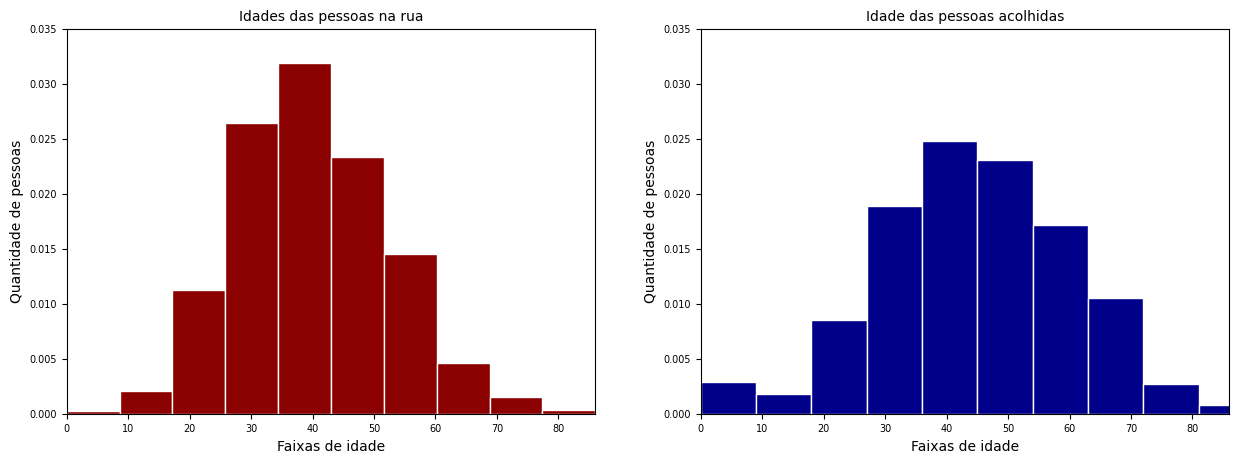

In [49]:
faixas = np.arange(0 , 100 , 10)

plt.figure(figsize=(15,5))

plt.subplot(121)

plt.hist(df_hist_rua['Idade'], edgecolor='white' , bins=len(faixas), color='darkred' , density = True)
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim( 0 , 0.035)
plt.xlim( 0 , 86)
plt.title('Idades das pessoas na rua', fontsize=10)

plt.subplot(122)

plt.hist(df_hist_acolhidos['Idade'], edgecolor='white' , bins=len(faixas)  , color='darkblue' , density=True )
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim( 0 , 0.035)
plt.xlim( 0 , 86)
plt.title('Idade das pessoas acolhidas', fontsize=10)
plt.show()

A análise do Histograma, valida a hipótese construída acerca da concentração de idade para diferentes faixas, e isso já permite mensurar que essa variável apresenta aspectos relevantes para a análise.

<p> Encerrando a análise acerca das variáveis que tangem à idade, vamos para a análise da variávei 'Classificação de idade' </p>

### Estabelecendo as  tabelas de Crosstab

In [50]:
pd.crosstab(df['Situação de rua'], df['Classificação de idade'], normalize='columns'  , margins=True) * 100

Classificação de idade,Criança,Adolescente,Juventude,Adulto,Idoso,All
Situação de rua,,,,,,
Acolhido,92.0,34.219269,38.045076,46.231121,69.98876,48.204896
Rua,8.0,65.780731,61.954924,53.768879,30.01124,51.795104


Aqui, já percebe-se as mesmas impressões de anteriormente, o que mostra como a hipótese foi validada dentro da análise em questão.

<h4> 2.1.2 Realizando uma Análise pautada nas Formas de Identificação </h4>

<h5> 1. Identificação pela Raça </h5>

In [53]:
tabela_cruzada = pd.crosstab(df['Situação de rua'], df['Cor_Raça_Etnia'] , normalize ='columns' , margins = True) #montagem da tabela cruzada
tabela_cruzada

Cor_Raça_Etnia,Amarela,Branca,Indígena,Não respondeu,Parda,Preta,Sem identificação,All
Situação de rua,,,,,,,,
Acolhido,0.543011,0.528226,0.575269,0.235294,0.466335,0.426484,0.207893,0.397927
Rua,0.456989,0.471774,0.424731,0.764706,0.533665,0.573516,0.792107,0.602073


<p> Análise da proporação para cada raça entre pessoas em situação de rua e acolhidos </p> 

In [55]:
#Vamos declarar novamente a tabela cruzada, mas com afinalidade de utilizá-la para a contrução do gráfico de Pizza
tabela_cruzada = pd.crosstab(df['Situação de rua'], df['Cor_Raça_Etnia'] , normalize ='index' , margins=True)
tabela_cruzada

Cor_Raça_Etnia,Amarela,Branca,Indígena,Não respondeu,Parda,Preta,Sem identificação
Situação de rua,,,,,,,
Acolhido,0.007972,0.248145,0.008445,0.007261,0.399605,0.184294,0.144278
Rua,0.004434,0.146479,0.004121,0.015597,0.302243,0.163798,0.363328
All,0.005842,0.186935,0.005842,0.012280,0.340986,0.171954,0.276162


Text(0.5, 1.0, 'Distribuição de raças das pessoas em situação de rua')

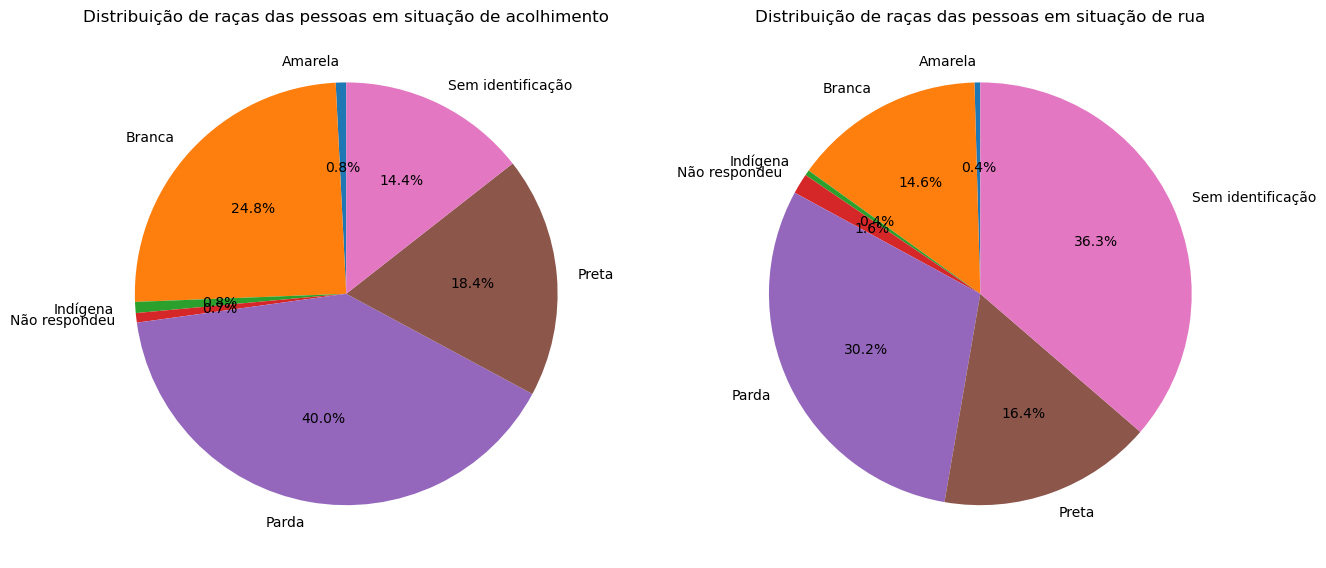

In [61]:
plt.figure(figsize=(15, 15))
plt.subplot(121)

#definindo as variaveis que serão utilizadas 
valores_acolhidos = tabela_cruzada.loc['Acolhido'].values
rotulos = tabela_cruzada.columns.tolist()

# Criando um gráfico de pizza
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
plt.pie(valores_acolhidos, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de acolhimento')

# Criando um gráfico de pizza que relaciona a quantidade de moradores em situação de Acolhimento e raças
plt.subplot(122)

#definindo as variaveis que serão utilizadas 
valores_rua = tabela_cruzada.loc['Rua'].values

# Criando um gráfico de pizza
plt.pie(valores_rua, labels=rotulos, autopct='%1.1f%%', colors=cores, startangle=90)

# Adicionando um título
plt.title(f'Distribuição de raças das pessoas em situação de rua')

<p> Nesse caso, observa-se que existem cores que estão em maior prevalência para o acolhidos, como, por exemplo, 'Pardos e Brancos'. Porém, ao observar-se 

#### 2.2.2 Análise Pautada no Gênero 

In [ ]:
df_sexo = df.loc[(df.Sexo != 'Sem identificação')]
sexo_x_situacao = dict(pd.crosstab(df_sexo['Situação de rua'],df_sexo.Sexo, normalize='columns'))


acolhidos = []
rua = []

for i in sexo_x_situacao:
    acolhidos.append(round(sexo_x_situacao[i][0],2)*100)
    rua.append(round(sexo_x_situacao[i][1],2)*100)


subprefeituras = list(sexo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(10,5))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="10")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Sexo em SP', fontsize="10")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="10", rotation=90)
ax.legend(loc='upper left', fontsize="10")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='10')

plt.show()

### 2.3. Análise Pautada na Geolocalização 

In [ ]:
tabela_cruzada_loc = pd.crosstab(df['Situação de rua'], df["Distrito"]) #montagem da tabela cruzada
tabela_cruzada_loc

In [ ]:
#Criando lista de latitude e longitude dos distritos
lista_nomes_dist = []
lat = []
lon = []

for i in range(len(df.Distrito)):
    if df.Distrito[i] not in lista_nomes_dist:
        lista_nomes_dist.append(df.Distrito[i])
        lat.append(df.Latitude[i])
        lon.append(df.Longitude[i])

In [ ]:
qnt_rua = list(tabela_cruzada_loc.loc['Rua'].values) #fazendo uma lista por meio da tabela cruzada da quantidade de pessoas em situação de rua

##### 2.3.1 Definindo uma função para colorir o marcador que ficará no mapa em função da quantidade de pessoas em situação de rua

In [ ]:
map = folium.Map(location=[-23.550520, -46.633308], zoom_start=6, tiles='OpenStreetMap') # criando um mapa centrado em SP

In [ ]:
def colour_marker(qnt_rua):
    if qnt_rua < 200:  #Menos de 200 pessoas em situação de rua
        return 'green'
    elif 200 <= qnt_rua < 500: #Menos de 500 pessoas em situação de rua e mais de 200
        return 'orange'
    else:
        return 'red'#Mais de 500 pessoas em situação de rua

##### 2.3.2 Definindo marcadores para as pessoas em situação de Rua

In [ ]:
f = folium.FeatureGroup(name= "Rua" ) 

for lt, ln, qnt in zip(lat, lon, qnt_rua):
    f.add_child(folium.CircleMarker(location=[lt, ln], radius=6, popup=str(qnt)+" m",
    fill_color=colour_marker(qnt), color = 'grey', fill=True, fill_opacity=0.7))

In [ ]:
map.add_child(f) 
map.add_child(folium.LayerControl())

#### 2.4. Análise Pautada nas Subprefeituras e nas suas Particularidades

In [ ]:
#print(pd.Series(df.Subprefeitura.value_counts()))
o = 0
lista_subprefeituras = []
for i  in df.Subprefeitura.values:
    if i not in lista_subprefeituras: 
        lista_subprefeituras.append(i)

In [ ]:
sub_x_situacao = pd.crosstab(df['Situação de rua'],df.Subprefeitura, normalize='columns')
acolhidos = []
rua = []

for i in sub_x_situacao:
    acolhidos.append(round(sub_x_situacao[i][0],2)*100)
    rua.append(round(sub_x_situacao[i][1],2)*100)


In [ ]:
subprefeituras = list(sub_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(140,60))
c = 'red'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c)
    ax.bar_label(rects, padding=10, fontsize="40")
    multiplier += 1
    c = 'green'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Subprefeituras SP (% por subprefeitura)', fontsize="100")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="60", rotation=90)
ax.legend(loc='upper left', fontsize="50")
ax.set_ylim(0, 100)

plt.show()

### 2.5Análise Baseada no tempo na situação 

In [ ]:
df_rua = df.loc[filtro_rua , :]
df_ac = df.loc[filtro_acolhidos , :]


In [ ]:
df['Tempo na situação'].value_counts(normalize = True ).to_frame()

In [ ]:
df_rua['Tempo na situação'].value_counts(normalize=True).to_frame()

In [ ]:
df_ac['Tempo na situação'].value_counts(normalize=True).to_frame()

### Construção da Visualização do Comparativo 

In [ ]:
tempo_x_situacao = dict(pd.crosstab(df['Situação de rua'],df['Tempo na situação'], normalize='columns'))


acolhidos = []
rua = []

for i in tempo_x_situacao:
    acolhidos.append(round(tempo_x_situacao[i][0],2)*100)
    rua.append(round(tempo_x_situacao[i][1],2)*100)


subprefeituras = list(tempo_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))
c = 'darkred'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c , edgecolor='white')
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'darkgreen'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Tempo na situação de Rua', fontsize="15")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

### 2.6. Análise Baseada em Parentes no Centro de Acolhimento 

##### Identificação das variáveis na series 

In [ ]:
filtro_CA = df['Parentes no CA'] != 'Não informado'
df_CA = df.loc[filtro_CA , :]
df_CA['Parentes no CA'].value_counts(normalize=True).to_frame()

In [ ]:
df_ac = df_ac.loc[filtro_CA , :]
df_ac['Parentes no CA'].value_counts(normalize = True).to_frame()

In [ ]:
df_rua = df_rua.loc[filtro_CA , :]
df_rua['Parentes no CA'].value_counts(normalize = True).to_frame()

In [ ]:
parentes_x_situacao = dict(pd.crosstab(df_CA['Situação de rua'],df['Parentes no CA'], normalize='columns'))


acolhidos = []
rua = []

for i in parentes_x_situacao:
    acolhidos.append(round(parentes_x_situacao[i][0],2)*100)
    rua.append(round(parentes_x_situacao[i][1],2)*100)


subprefeituras = list(parentes_x_situacao)

situacao = {
    'Situação de Rua': rua,
    'Acolhidos': acolhidos
}

x = np.arange(len(subprefeituras))  # the label locations
width = 0.25 # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1,1,figsize=(15,5))
c = 'lightblue'
for attribute, measurement in situacao.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=c , edgecolor='white')
    ax.bar_label(rects, padding=10, fontsize="15")
    multiplier += 1
    c = 'pink'


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Rua e Acolhidos por Tempo na situação de Rua', fontsize="15")
ax.set_xticks(x + width - 0.1255, subprefeituras, fontsize="15", rotation=90)
ax.legend(loc='upper left', fontsize="15")
ax.set_ylim(0, 100)
plt.ylabel('% de pessoas', fontsize='15')

plt.show()

### 3 Análises Quantitativas

In [ ]:
df_quants = df.iloc[: , 20: ]
df_quants.columns

#### Separando em Acolhidos e em Situação de Rua

In [ ]:
filtro_rua = df['Situação de rua'] == 'Rua'
filtro_acolhidos = df['Situação de rua'] == 'Acolhido'

In [ ]:
df_quants_rua = df.loc[filtro_rua , : ]
df_quants_acolhidos = df.loc[filtro_acolhidos , :]

##### Analise da PEA18M

In [ ]:
# analisando em situação de rua

df_quants_rua.PEA18M.describe()

In [ ]:
#analisando acolhidos
df_quants_acolhidos.PEA18M.describe()

##### Gráfico que mostra a quantidade de pessoas econômicamente ativas dentro dos distritos com relatos em pessoas em situação de rua e ativos

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.PEA18M, edgecolor='white' , bins = 10, color='darkred' , density = True)
plt.xlabel('Quantidade de pessoas', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Pop economicamente ativa acima de 18 rua', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.PEA18M, edgecolor='white' , bins = 10, color='darkblue' , density=True )
plt.xlabel('Quantidade de pessoas', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('Pop economicamente ativa acima de 18 acolhidos', fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.PEA18M,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Pop economicamente ativa acima de 18 rua')
plt.ylabel('Qnt')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.PEA18M,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Pop economicamente ativa acima de 18 acolhido')
plt.ylabel('Qnt')

##### Analise de T_FUNDIN_TODOS_MMEIO (Moradias vuneráveis a pobreza)

In [ ]:
df_quants_rua.T_FUNDIN_TODOS_MMEIO.describe()

In [ ]:
df_quants_acolhidos.T_FUNDIN_TODOS_MMEIO.describe()

In [ ]:
plt.figure(figsize=(10,5))
faixas = np.arange(0,14,1)
plt.subplot(121)

plt.hist(df_quants_rua.T_FUNDIN_TODOS_MMEIO, bins=faixas, edgecolor='white', color='darkred' , density = True)
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('%Moradias vuneráveis a pobreza rua', fontsize=10)
plt.ylim(0,0.6)
plt.xlim( 0 , 9)
plt.subplot(122)

plt.hist(df_quants_acolhidos.T_FUNDIN_TODOS_MMEIO, bins=faixas, edgecolor='white', color='darkblue' , density=True )
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0,0.6)
plt.xlim( 0 , 9)
plt.title('%Moradias vuneráveis a pobreza acolhidos', fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.T_FUNDIN_TODOS_MMEIO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Moradias vuneráveis a pobreza rua')
plt.ylabel('Porcentagem')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.T_FUNDIN_TODOS_MMEIO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Moradias vuneráveis a pobreza acolhidos')
plt.ylabel('Porcentagem')

##### Analise de AGUA_ESGOTO

In [ ]:
df_quants_rua.AGUA_ESGOTO.describe()

In [ ]:
df_quants_acolhidos.AGUA_ESGOTO.describe()

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.AGUA_ESGOTO, edgecolor='white', color='darkred' , bins = 40, density = True)
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('% Saneamento', fontsize=10)
plt.xlim(0, 1)

plt.subplot(122)

plt.hist(df_quants_acolhidos.AGUA_ESGOTO, edgecolor='white', color='darkblue' , bins = 40, density=True )
plt.xlabel('Porcentagem', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0, 1)

plt.title('%Saneamento', fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.AGUA_ESGOTO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Saneamento rua')
plt.ylabel('Porcentagem')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.AGUA_ESGOTO,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('%Saneamento acolhidos')
plt.ylabel('Porcentagem')

##### Analise de RENOCUP (Rendimento médio da população)

In [ ]:
df_quants_rua.RENOCUP.describe()

In [ ]:
df_quants_acolhidos.RENOCUP.describe()

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.RENOCUP, edgecolor='white', color='darkred' , density = True)
plt.xlabel('QNT', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Renocup Ruas ', fontsize=10)
plt.xlim(0 , 7000)
plt.ylim( 0 , 8e-4)
plt.subplot(122)

plt.hist(df_quants_acolhidos.RENOCUP, edgecolor='white', color='darkblue' , density=True )
plt.xlabel('QNT', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0 , 7000)
plt.ylim( 0 , 8e-4)
plt.title('Renocup Acolhidos', fontsize=10)
plt.show()

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(131)

plt.boxplot(df_quants_rua.RENOCUP, 
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Renocup')
plt.ylabel('Qnt')

plt.subplot(132)

plt.boxplot(df_quants_acolhidos.RENOCUP,  
            boxprops=dict(color='blue'),
            medianprops=dict(color='gray'),
            capprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            flierprops=dict(color='yellow', markeredgecolor='springgreen')
            )
plt.title('Renocup')
plt.ylabel('QNT')

##### Análise IDH

In [ ]:
faixas = np.arange(0 , 1 , 0.05)
plt.figure(figsize=(10,5))
plt.subplot(121)

plt.hist(df_quants_rua.IDHM, edgecolor='white' , bins = faixas ,color='orange' , density = True )
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=10)
plt.ylabel('Densidade (%)', fontsize=10)
plt.xticks(fontsize=7)
plt.xlim( 0 , 1)
plt.ylim( 0 , 15)
plt.yticks(fontsize=7)
plt.title('IDHM RUA ', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.IDHM, edgecolor='white' , bins = faixas ,  color='skyblue' , density = True)
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=10)
plt.ylabel('Densidade (%)', fontsize=10)
plt.ylim( 0 , 15)
plt.xlim( 0 , 1)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('IDHM ACOLHIDOS', fontsize=10)
plt.show()

### Conclusão Acerca desse Target 

<p> Aqui, percebe-se que: Para Valores de IDH maiores que 0.8%, há uma tendência maior de números de acolhimento. Porém, para valores menores que 0.8%, registrados nessa base de dados, há uma tensdência ligeiramente maior de maior presença de moradores de rua em relação aos acolhimentos. Assim, a anáise do IDH pode ter uma relevância na análise. </p>

### Análise dos Índices de Escolaridade ( I_ESCOLARIDADE) 

#### Frequência desse Índice para cada um dos DataFrames

In [ ]:
# Frequência para os municípios com registros de moradores de rua
df_quants_rua.I_ESCOLARIDADE.value_counts( normalize = True ).to_frame()

In [ ]:
# Frequência para os municípios com registros de moradores acolhidos
df_quants_acolhidos.I_ESCOLARIDADE.value_counts( normalize = True ).to_frame()

In [ ]:
df_quants_rua.I_ESCOLARIDADE.describe().to_frame()

In [ ]:
df_quants_acolhidos.I_ESCOLARIDADE.describe().to_frame()

In [ ]:
plt.figure(figsize=(10,5))

faixas = np.arange( 0 , 1 , 0.1)

plt.subplot(121)

plt.hist(df_quants_rua.I_ESCOLARIDADE, edgecolor='black' ,  color='darkblue' , bins = faixas , density = True )
plt.xlabel('Índice de Escolaridade (%)', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Escolaridade  das Subprefeituras de rua', fontsize=10)
plt.xlim( 0 , 1)
plt.ylim( 0 , 10 )
plt.subplot(122)

plt.hist(df_quants_acolhidos.I_ESCOLARIDADE, edgecolor='black' ,  color='darkred' , bins = faixas ,  density = True )
plt.xlabel('Índice de Escolaridade', fontsize=10)
plt.ylabel('Densidade ', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim( 0 , 1)
plt.ylim( 0 , 10 )
plt.title('Escolaridade  das Subprefeituras de Acolhimento', fontsize=10)
plt.show()

### Conclusões 

<p> Para Índices de Escolaridade Superiores a 0.8%, temos que há uma tendência maior para índices de acolhimento. Porém, para índices menores que 0.8%, há uma maior tendência dessas pessoas estarem em situação de rua. </p>

#### Índice de Frequência Populacional (I_FREQ_PROP)

###### Frequência de valores em cada dataframe

In [ ]:
df_quants_rua.I_FREQ_PROP.value_counts( normalize = True ).to_frame()

In [ ]:
df_quants_acolhidos.I_FREQ_PROP.value_counts( normalize = True ).to_frame()

##### Medidas  - Resumo para cada Dataframe

In [ ]:
df_quants_acolhidos.I_FREQ_PROP.describe().to_frame()

In [ ]:
df_quants_rua.I_FREQ_PROP.describe().to_frame()

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.I_FREQ_PROP, edgecolor='black' , bins = faixas ,   color='darkblue' , density = True )
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0 , 1 )
plt.ylim( 0 , 7)
plt.title('FREQ POP das SUBPREFEITURAS', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.I_FREQ_PROP, edgecolor='black' , bins = faixas ,   color='darkred' , density = True)
plt.xlabel('Faixas de idade', fontsize=10)
plt.ylabel('Quantidade de pessoas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim(0 , 1 )
plt.ylim( 0 , 7)
plt.title('FREQ POP das SUBPREFEITURAS', fontsize=10)
plt.show()

### Conclusões 

<p> Para valores desse Índice menores que 0.8, percebe-se uma presença maior de Acolhidos. Porém, para Valores inferiores a 0.8, há uma presença maior de pessoas em situação de rua. </p>

##### POPULAÇÂO TOTAL QUE RESIDE EM MUNICÌPIOS PARTICULARES PERMANENTES (POP)

In [ ]:
df_quants_rua.POP.value_counts( normalize = True ).to_frame()

In [ ]:
df_quants_acolhidos.POP.value_counts( normalize = True ).to_frame()

In [ ]:
df_quants_rua.POP.describe().to_frame()

In [ ]:
df_quants_acolhidos.POP.describe().to_frame()

In [ ]:

plt.figure(figsize=(10,5))

plt.subplot(121)

plt.hist(df_quants_rua.POP, edgecolor='black' , bins = 10 ,   color='darkblue' , density = True )
plt.xlabel('População que reside em Domicílios Particulares', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim( 0 , 0.00001)
plt.xlim( 0 , 600000)
plt.title('FREQ POP das RUAS', fontsize=10)

plt.subplot(122)

plt.hist(df_quants_acolhidos.POP, edgecolor='black' ,bins = 10 ,   color='darkred' , density = True)
plt.xlabel('População que reside em Domicílios Particulares', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim( 0 , 0.00001)
plt.xlim( 0 , 600000)
plt.title('FREQ POP Acolhidos', fontsize=10)
plt.show()

#### Conclusões 

<p> Para A Faixa de valores próximos a 40 mil pessoas, há uma tendência maior de número de pessoas em situação de rua. Porém, para valores superiores a essa faixa, temos uma clara tendência de adesão à acolhimento

#### Análise da Renda Per Capita (RDPC)

In [ ]:
df_quants_rua['RDPC'].value_counts(normalize=True).to_frame()

In [ ]:
df_quants_rua['RDPC'].value_counts(normalize=True).to_frame()

In [ ]:
df_quants_rua['RDPC'].describe().to_frame()

In [ ]:
df_quants_acolhidos['RDPC'].describe().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
faixas=np.arange(0, 6500, 400)

plt.subplot(121)

plt.hist(df_quants_rua['RDPC'], edgecolor='white' , bins=faixas , color='darkred' , density=True )
plt.xlabel('Renda per Capita', fontsize=10)
plt.ylabel('Densidade', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim( 0 , 6000)
plt.ylim(0, 0.0012)
plt.title('Renda per capita dos registros de rua', fontsize=12)

plt.subplot(122)

plt.hist(df_quants_acolhidos['RDPC'], edgecolor='white' , bins=faixas , color='darkBLUE' , density=True)
plt.xlabel('Renda per Capita', fontsize=10)
plt.ylabel('Quantidade de pessoas acolhidas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlim( 0 , 6000)
plt.ylim(0, 0.0012)
plt.title('Renda per capita dos registros de acolhimentos', fontsize=12)

plt.show()

#### Conclusões

<p> Para valores da Faixa maiores que 3000 , há uma maior tendência de registros de pessoas em situação de rua. Porém, para valores abaixo dessa faixa, há uma tendência maior de porcentagens de Acolhimento.

#### Análise do PPOB - Proporção de vuneráveis à pobreza

In [ ]:
df_quants_rua['PPOB'].value_counts(normalize = True ).to_frame()

In [ ]:
df_quants_acolhidos['PPOB'].value_counts(normalize = True ).to_frame()

In [ ]:
df_quants_rua['PPOB'].describe().to_frame()

In [ ]:
df_quants_acolhidos['PPOB'].describe().to_frame()

In [ ]:
plt.figure(figsize=(10,5))

faixas=np.arange(0, 20, 1)

plt.subplot(121)

plt.hist(df_quants_rua['PPOB'], edgecolor='black' , bins=faixas , color='skyblue', density=True)
plt.xlabel('Proporção de vuneráveis à pobreza', fontsize=10)
plt.ylabel('Quantidade de pessoas em situação de rua', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.6)
plt.xlim(0, 30)
plt.title('Proporção de vuneráveis à pobreza em situação de rua', fontsize=8)

plt.subplot(122)

plt.hist(df_quants_acolhidos['PPOB'], edgecolor='black' , bins=faixas , color='darkred', density=True)
plt.xlabel('Proporção de vuneráveis à pobreza', fontsize=10)
plt.ylabel('Quantidade de pessoas acolhidas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.6)
plt.xlim(0, 30)
plt.title('Proporção de vuneráveis à pobreza de pessoas acolhidas', fontsize=8)

plt.show()

<p> Para valores menores que 5, há maior tendência de pessoas em situação de rua. Já em casos de Valores maiores que 5, a tendência de estarem em situação de acolhimento é ligeiramente maior. 

#### Análise do Índice de Desigualdade Social (GINI) 

In [ ]:
df_quants_rua['GINI'].value_counts(normalize=True).to_frame()

In [ ]:
df_quants_acolhidos['GINI'].value_counts(normalize=True).to_frame()

In [ ]:
df_quants_rua['GINI'].describe().to_frame()

In [ ]:
df_quants_acolhidos['GINI'].describe().to_frame()

In [ ]:
plt.figure(figsize=(10,5))

faixas = np.arange(0,1,0.05)

plt.subplot(121)

plt.hist(df_quants_rua['GINI'], edgecolor='white' , bins=faixas, color='darkred', density=True)
plt.xlabel('Índice de GINI', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=7)
plt.ylim(0 , 15)
plt.xlim(0 , 1)
plt.title('Índice de GINI de pessoas em situação de rua', fontsize=12)

plt.subplot(122)

plt.hist(df_quants_acolhidos['GINI'], edgecolor='white' , color='darkred', bins=faixas, density=True)
plt.xlabel('Índice de GINI', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0 , 15)
plt.xlim(0 , 1)
plt.title('Índice de GINI de pessoas acolhidas', fontsize=12)

plt.show()

##### Conclusões 

<p> Nesse caso, percebe-se que há uma grande dificuldade de observação de diferença entre ambos os Histogramas, e, por isso, percebe-se que, o índice de Gini, pode não ser um parâmetro que identifique informações relevantes para um modelo preditivo. Por, no Geral, apresentar informações muito próximas.

#### Percentual da população de menos de 15 anos e da população de 65 anos e mais em relação à população de 15 a 64 anos (RAZDEP)

In [ ]:
df_quants_rua['RAZDEP'].value_counts(normalize=True).to_frame()

In [ ]:
df_quants_acolhidos['RAZDEP'].value_counts(normalize=True).to_frame()

In [ ]:
df_quants_rua['RAZDEP'].describe().to_frame()

In [ ]:
df_quants_acolhidos['RAZDEP'].describe().to_frame()

In [ ]:
plt.figure(figsize=(10,5))

faixas = np.arange(0, 50, 2)

plt.subplot(121)

plt.hist(df_quants_rua['RAZDEP'], edgecolor='white' , bins=faixas , color='darkred', density=True)
plt.xlabel('RAZDEP', fontsize=10)
plt.ylabel('Quantidade de pessoas em situação de rua', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.25)
plt.xlim(0, 45)
plt.title('RAZDEP de pessoas em situação de rua', fontsize=12)

plt.subplot(122)

plt.hist(df_quants_acolhidos['RAZDEP'], edgecolor='white' , bins=faixas , color='darkblue', density=True)
plt.xlabel('RAZDEP', fontsize=10)
plt.ylabel('Quantidade de pessoas acolhidas', fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.ylim(0, 0.25)
plt.xlim(0, 45)
plt.title('RAZDEP de pessoas acolhidas', fontsize=12)

plt.show()

<p> Para Valores maiores que 40%, há uma concentração maior de pessoas acolhidas. Já para valores menores, há uma quantidade maior de pessoas em situação de Rua.

## 4. Machine Learning

---
### Classificador por Decision Tree
---

In [ ]:
#Função para separar as variaveis 

df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino',
'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
'Classificação de idade_Idoso','Cor_Raça_Etnia_Amarela',
'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
'Cor_Raça_Etnia_Preta',
'Tempo na situação_Até 1 semana',
'Tempo na situação_Entre 1 semana e 1 mês',
'Tempo na situação_Mais de 1 ano até 2 anos',
'Tempo na situação_Mais de 1 mês até 6 meses',
'Tempo na situação_Mais de 10 anos',
'Tempo na situação_Mais de 2 anos até 5 anos',
'Tempo na situação_Mais de 5 anos até 10 anos',
'Tempo na situação_Mais de 6 meses até 1 ano',
'Parentes no CA_Não',
'Parentes no CA_Sim','IDHM','I_ESCOLARIDADE','I_FREQ_PROP',
'T_FUNDIN_TODOS_MMEIO','AGUA_ESGOTO','RENOCUP','RDPC','PPOB','GINI','RAZDEP', 'POP', 'PEA18M']

def splitdataset(df): 

    # Separating the target variable 
    X = df[lista] 
    Y = df['Situação de rua'] 

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.1, random_state = 100) 
        
    return X, Y, X_train, X_test, y_train, y_test 

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 

    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=100, min_samples_leaf=50) 

    # Performing training 
    clf_gini.fit(X_train, y_train)

    return clf_gini 
        
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, y_train): 

    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 100, min_samples_leaf = 50) 

    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

# Function to make predictions 
def prediction(X_test, clf_object): 

    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
        
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
        
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
        
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
        
    print("Report : ", 
    classification_report(y_test, y_pred)) 

# Driver code 
def main(df): 

    # Building Phase 
    data = df 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = train_using_entropy(X_train, X_test, y_train) 
    print('-'*20, 'Test', '-'*20)           
    # Operational Phase 
    print("Results Using Gini Index:") 
        
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy)
    print('-'*20, 'Train', '-'*20)
    print("Results Using Gini Index:")
    # Prediction using gini 
    y_pred_gini = prediction(X_train, clf_gini) 
    cal_accuracy(y_train, y_pred_gini) 
        
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_train, clf_entropy) 
    cal_accuracy(y_train, y_pred_entropy)



In [ ]:
# Calling main function 
if __name__=="__main__": 
    main(df_encoded)

---
### Classificador por Regressão Logística
---

In [ ]:
df_regressao_logistica = df
lista_ints= ['RAZDEP' , 'PPOB' , 'RDPC' , 'RENOCUP' , 'T_FUNDIN_TODOS_MMEIO' , 'PEA18M' , 'POP']

scaler = preprocessing.MinMaxScaler()
for i in range(len(lista_ints)):
    nome_target = lista_ints[i]
    coluna_normalizada = df[[nome_target]]
    df_regressao_logistica[nome_target] = scaler.fit_transform(coluna_normalizada)

In [ ]:

df_encoded = pd.get_dummies(df_regressao_logistica, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 
    'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
    'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
    'Classificação de idade_Idoso',
    'Cor_Raça_Etnia_Amarela',
    'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
    'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
    'Cor_Raça_Etnia_Preta', 
    'Tempo na situação_Até 1 semana',
    'Tempo na situação_Entre 1 semana e 1 mês',
    'Tempo na situação_Mais de 1 ano até 2 anos',
    'Tempo na situação_Mais de 1 mês até 6 meses',
    'Tempo na situação_Mais de 10 anos',
    'Tempo na situação_Mais de 2 anos até 5 anos',
    'Tempo na situação_Mais de 5 anos até 10 anos',
    'Tempo na situação_Mais de 6 meses até 1 ano',
    'Tempo na situação_NR/NS', 'Parentes no CA_Não',
    'Parentes no CA_Sim' , 'IDHM' , 'I_ESCOLARIDADE' , 'I_FREQ_PROP' , 'AGUA_ESGOTO' , 'GINI' , 'RAZDEP' , 'PPOB' , 'RDPC' , 'RENOCUP' , 'T_FUNDIN_TODOS_MMEIO' , 'PEA18M' , 'POP']


X = df_encoded[lista] 
Y = df_encoded['Situação de rua'] 

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
logistic_regression= LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

---
### Classificador por Naive Bayes
---

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sexo', 'Classificação de idade', 'Cor_Raça_Etnia','Tempo na situação','Parentes no CA'])

lista = ['Sexo_Feminino', 'Sexo_Masculino', 
    'Classificação de idade_Criança', 'Classificação de idade_Adolescente',
    'Classificação de idade_Juventude', 'Classificação de idade_Adulto',
    'Classificação de idade_Idoso',
    'Cor_Raça_Etnia_Amarela',
    'Cor_Raça_Etnia_Branca', 'Cor_Raça_Etnia_Indígena',
    'Cor_Raça_Etnia_Não respondeu', 'Cor_Raça_Etnia_Parda',
    'Cor_Raça_Etnia_Preta', 
    'Tempo na situação_Até 1 semana',
    'Tempo na situação_Entre 1 semana e 1 mês',
    'Tempo na situação_Mais de 1 ano até 2 anos',
    'Tempo na situação_Mais de 1 mês até 6 meses',
    'Tempo na situação_Mais de 10 anos',
    'Tempo na situação_Mais de 2 anos até 5 anos',
    'Tempo na situação_Mais de 5 anos até 10 anos',
    'Tempo na situação_Mais de 6 meses até 1 ano',
    'Tempo na situação_NR/NS', 'Parentes no CA_Não',
    'Parentes no CA_Sim' , 'IDHM' , 'I_ESCOLARIDADE' , 'I_FREQ_PROP' , 'AGUA_ESGOTO' , 'GINI' , 'RAZDEP' , 'PPOB' , 'RDPC' , 'RENOCUP' , 'T_FUNDIN_TODOS_MMEIO' , 'PEA18M' , 'POP']

bayes_clf = MultinomialNB() # Multinomial pois ela trabalha com valores discretos, enquanto a Gaussian trabalha com valores contínuos.
bayes_clf.fit(X_train,  y_train)

X = df_encoded[lista] 
Y = df_encoded['Situação de rua'] 

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

Y_predict = pd.Series(bayes_clf.predict(X_test))


accuracy_topNB = accuracy_score(y_test, Y_predict)

print(f'Acurácia: {accuracy_topNB}')
